In [2]:
import pandas as pd
import os
from pathlib import Path
from pyalex import Works, Authors, Sources, Institutions, Topics, Publishers, Funders
from pyalex import config
from tqdm import tqdm 
import json

In [3]:
from pyalex import config

config.email = "rde6mn@virginia.edu"
config.max_retries = 5
config.retry_backoff_factor = 0.1
config.retry_http_codes = [429, 500, 503]

In [18]:
df = pd.read_csv("test8.csv")

In [19]:
df = df.drop_duplicates(subset=['OpenAlex_ID'], keep='first')

In [35]:
list_cols_to_str = ['ReferencedTeams', 'ReferencedWorks', 'IntReferences']

for col in list_cols_to_str:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: eval(x) if isinstance(x, str) and x.startswith('[') else x)

In [31]:
df

,Unnamed: 0.1,Unnamed: 0,manuscript_title,team,doi_pre,doi_pub,original_research,OpenAlex_ID,ListofAlexIds,ListofNames,...,NumInternalReferences,CitedByCount,CitedByInternal,CleanedTeam,TeamsThatCited,ReferencedTeams,IntReferences,ReferencedIndividuals,CleanedTeams,CleanedPeople
0,0,0.0,LRRK2 phosphorylation of Rab GTPases in Parkin...,Alessi,review,10.1002/1873-3468.14492,0.0,W4296162466,A5033452410,Suzanne R. Pfeffer,...,2,47.0,8.0,['Team Alessi'],"['Team Hurley', 'Team Alessi', 'Team De Camilli']",[Team Alessi],"['W3204672542', 'W3205174301']","['Dario Alessi', 'Suzanne Pfeffer']",['Team Alessi'],['Suzanne Pfeffer']
1,2,2.0,PTEN-induced kinase 1 (PINK1) and Parkin: Unlo...,Alessi,review,10.1016/j.conb.2021.09.005,0.0,W3209929601,A5084528692,Miratul M. K. Muqit,...,1,73.0,1.0,['Team Alessi'],"['Team Harper', 'Team Reck-Peterson', 'Team Al...",[Team Hurley],['W3153643350'],['James Hurley'],['Team Alessi'],['Miratul Muqit']
2,6,6.0,Isotope tracing in health and disease,Alessi,review,10.1016/j.copbio.2022.102739,0.0,W4283208018,A5045437960,Monther Abu-Remaileh,...,0,17.0,1.0,['Team Alessi'],['Team Alessi'],[],[],[],['Team Alessi'],['Monther Abu-Remaileh']
3,9,9.0,Whole proteome copy number dataset in primary ...,Alessi,none? review,10.1016/j.dib.2023.109336,0.0,W4381848193,A5084528692,Miratul M. K. Muqit,...,1,3.0,0.0,['Team Alessi'],[],[Team Alessi],['W3213349298'],['Miratul Muqit'],['Team Alessi'],['Miratul Muqit']
4,13,13.0,Role of autophagy pathway in Parkinson’s disea...,Alessi,review,10.1016/j.jmb.2023.168144,0.0,W4376272271,A5084528692,Miratul M. K. Muqit,...,3,32.0,1.0,['Team Alessi'],['Team Hurley'],"[Team Alessi, Team Wood]","['W3213349298', 'W4290803974', 'W4293581901']","['Miratul Muqit', 'Dario Alessi', 'Sonia Gandhi']",['Team Alessi'],['Miratul Muqit']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,6284,NaN,NaN,Voet,NaN,NaN,NaN,NaN,A5044812020,NaN,...,0,NaN,NaN,NaN,NaN,[],[],[],[],NaN
883,6285,NaN,NaN,Voet,NaN,NaN,NaN,NaN,A5037440162,NaN,...,0,NaN,NaN,NaN,NaN,[],[],[],[],NaN
884,6314,NaN,NaN,Wichmann,NaN,NaN,NaN,NaN,A5073427053,NaN,...,0,NaN,NaN,NaN,NaN,[],[],[],[],NaN
885,6315,NaN,NaN,Wichmann,NaN,NaN,NaN,NaN,A5056482545,NaN,...,0,NaN,NaN,NaN,NaN,[],[],[],[],NaN


In [21]:
df

,Unnamed: 0.1,Unnamed: 0,manuscript_title,team,doi_pre,doi_pub,original_research,OpenAlex_ID,ListofAlexIds,ListofNames,...,NumInternalReferences,CitedByCount,CitedByInternal,CleanedTeam,TeamsThatCited,ReferencedTeams,IntReferences,ReferencedIndividuals,CleanedTeams,CleanedPeople
0,0,0.0,LRRK2 phosphorylation of Rab GTPases in Parkin...,Alessi,review,10.1002/1873-3468.14492,0.0,W4296162466,A5033452410,Suzanne R. Pfeffer,...,2,47.0,8.0,['Team Alessi'],"['Team Hurley', 'Team Alessi', 'Team De Camilli']",[Team Alessi],"['W3204672542', 'W3205174301']","['Dario Alessi', 'Suzanne Pfeffer']",['Team Alessi'],['Suzanne Pfeffer']
1,2,2.0,PTEN-induced kinase 1 (PINK1) and Parkin: Unlo...,Alessi,review,10.1016/j.conb.2021.09.005,0.0,W3209929601,A5084528692,Miratul M. K. Muqit,...,1,73.0,1.0,['Team Alessi'],"['Team Harper', 'Team Reck-Peterson', 'Team Al...",[Team Hurley],['W3153643350'],['James Hurley'],['Team Alessi'],['Miratul Muqit']
2,6,6.0,Isotope tracing in health and disease,Alessi,review,10.1016/j.copbio.2022.102739,0.0,W4283208018,A5045437960,Monther Abu-Remaileh,...,0,17.0,1.0,['Team Alessi'],['Team Alessi'],[],[],[],['Team Alessi'],['Monther Abu-Remaileh']
3,9,9.0,Whole proteome copy number dataset in primary ...,Alessi,none? review,10.1016/j.dib.2023.109336,0.0,W4381848193,A5084528692,Miratul M. K. Muqit,...,1,3.0,0.0,['Team Alessi'],[],[Team Alessi],['W3213349298'],['Miratul Muqit'],['Team Alessi'],['Miratul Muqit']
4,13,13.0,Role of autophagy pathway in Parkinson’s disea...,Alessi,review,10.1016/j.jmb.2023.168144,0.0,W4376272271,A5084528692,Miratul M. K. Muqit,...,3,32.0,1.0,['Team Alessi'],['Team Hurley'],"[Team Alessi, Team Wood]","['W3213349298', 'W4290803974', 'W4293581901']","['Miratul Muqit', 'Dario Alessi', 'Sonia Gandhi']",['Team Alessi'],['Miratul Muqit']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784,5330,5330.0,Alpha-synuclein aggregates trigger anti-viral ...,Wood,10.1101/2024.02.26.582055,NaN,1.0,W4392272337,A5011838243,Thomas T. Warner,...,2,NaN,NaN,NaN,NaN,[Team Wood],"['W4283511977', 'W4293581901']","['Mina Ryten', 'Sonia Gandhi']","['Team Voet', 'Team Wood', 'Team Hardy']","['Thomas Warner', 'Sonia Gandhi', 'Mina Ryten']"
788,5361,5361.0,GLP1 receptor agonism ameliorates Parkinson’s ...,Wood,10.1101/2024.02.28.582460,NaN,1.0,W4392291460,A5042439287,Mina Ryten,...,2,NaN,NaN,NaN,NaN,[Team Wood],"['W4293581901', 'W4309907185']",['Sonia Gandhi'],"['Team Hardy', 'Team Wood']","['Mina Ryten', 'Mathew Horrocks', 'Sonia Gandhi']"
792,5382,5382.0,"The diversity of SNCA transcripts in neurons, ...",Wood,10.1101/2024.05.30.596437,NaN,1.0,W4399213038,A5020514779,John Hardy,...,4,NaN,NaN,NaN,NaN,[Team Wood],"['W4283511977', 'W4293581901', 'W4309907185', ...","['Mina Ryten', 'Sonia Gandhi', 'Michele Vendru...","['Team Hardy', 'Team Wood']","['John Hardy', 'Nicholas Wood', 'Michele Vendr..."
798,5400,5400.0,Network nature of ligand-receptor interactions...,Wood,10.1101/2024.06.15.599140,NaN,1.0,W4399716922,A5064529704,Nicholas Wood,...,4,NaN,NaN,NaN,NaN,"[Team Hardy, Team Wood]","['W4308571577', 'W4361262952', 'W4367316359', ...","['Huw Morris', 'Mina Ryten']","['Team Wood', 'Team Hardy']","['Nicholas Wood', 'Sonia Gandhi', 'Mina Ryten']"


In [29]:
df = pd.read_csv('test8.csv')

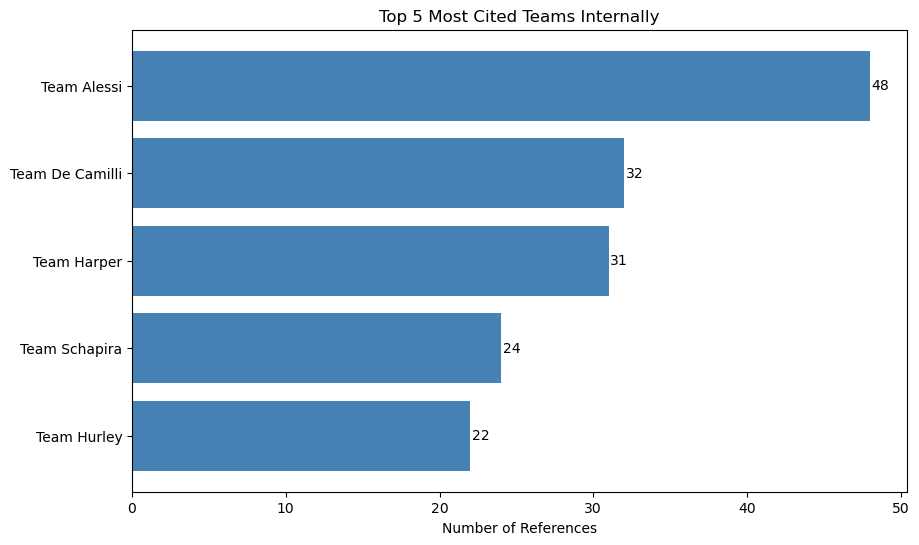

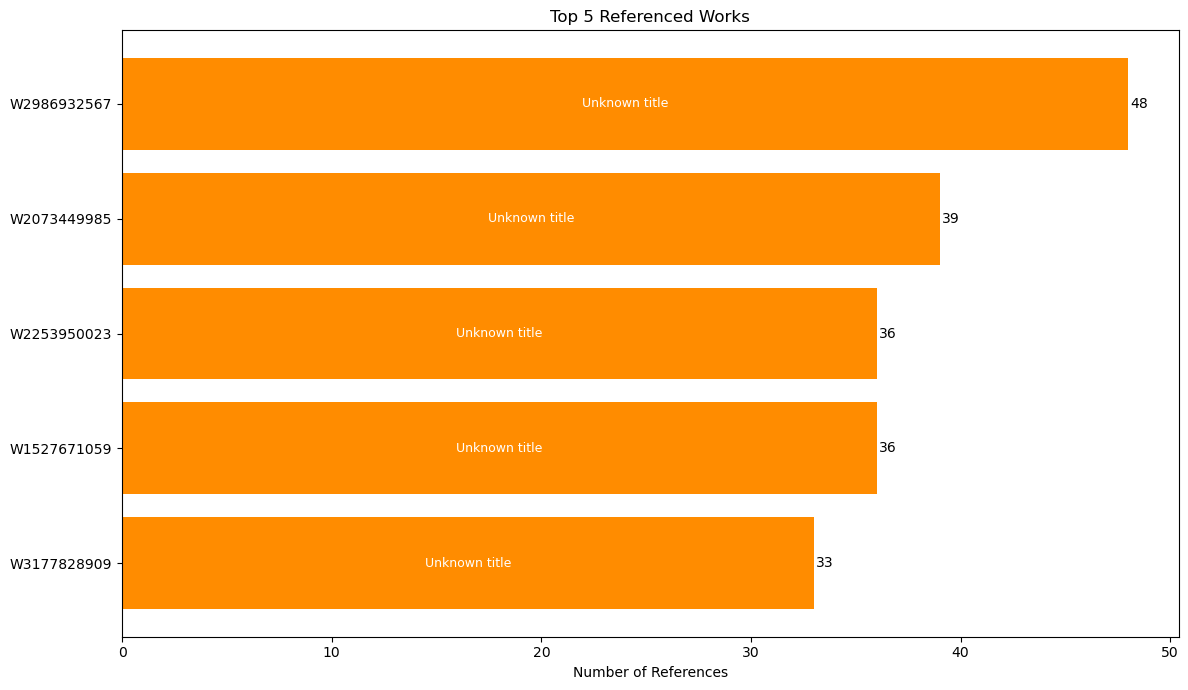

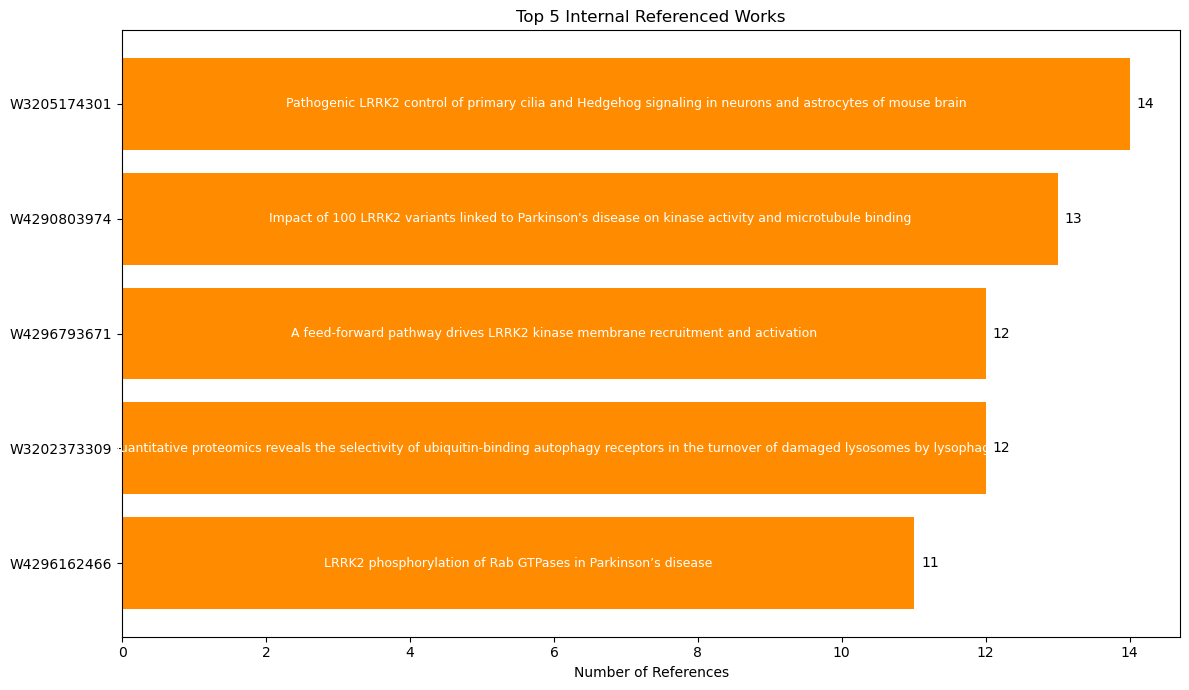

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Deduplicate df by publication
pubs_df = df.drop_duplicates(subset='OpenAlex_ID').copy()

# For referenced teams, also deduplicate by publication
# Extract relevant columns only
ref_team_df = pubs_df[['OpenAlex_ID', 'ReferencedTeams']].copy()

# For referenced works, get manuscript_title too
ref_work_df = pubs_df[['OpenAlex_ID', 'manuscript_title', 'ReferencedWorks', 'IntReferences']].copy()
from collections import Counter

team_counts = Counter()

for teams in ref_team_df['ReferencedTeams']:
    if not isinstance(teams, list):
        continue
    unique_teams = set(t for t in teams if pd.notna(t))
    for team in unique_teams:
        team_counts[team] += 1

# Top 5 teams by count
top_teams = team_counts.most_common(5)
teams, counts = zip(*top_teams)
work_counts = Counter()
work_titles = {}
int_work_counts = Counter()
int_work_titles = {}

for idx, row in ref_work_df.iterrows():
    refs = row['ReferencedWorks']
    title = row['manuscript_title']
    if not isinstance(refs, list):
        continue
    for ref in set(refs):  # count each referenced work once per publication
        if pd.isna(ref):
            continue
        work_counts[ref] += 1
        if ref not in work_titles:
            work_titles[ref] = None  # we will fix below

# Now map OpenAlex_ID to manuscript_title for referenced works, from df
id_to_title = df.drop_duplicates(subset='OpenAlex_ID').set_index('OpenAlex_ID')['manuscript_title'].to_dict()

for work in work_counts:
    if work in id_to_title:
        work_titles[work] = id_to_title[work]
    else:
        work_titles[work] = "Unknown title"

# Top referenced works (top 5)
top_works = work_counts.most_common(5)
work_ids, work_counts_top = zip(*top_works)
work_titles_top = [work_titles[w] for w in work_ids]
import matplotlib.pyplot as plt


#int refs

for idx, row in ref_work_df.iterrows():
    refs = row['IntReferences']
    title = row['manuscript_title']
    if not isinstance(refs, list):
        continue
    for ref in set(refs):  # count each referenced work once per publication
        if pd.isna(ref):
            continue
        int_work_counts[ref] += 1
        if ref not in int_work_titles:
            int_work_titles[ref] = None  # we will fix below

# Now map OpenAlex_ID to manuscript_title for referenced works, from df
int_id_to_title = df.drop_duplicates(subset='OpenAlex_ID').set_index('OpenAlex_ID')['manuscript_title'].to_dict()

for work in int_work_counts:
    if work in int_id_to_title:
        int_work_titles[work] = int_id_to_title[work]
    else:
        int_work_titles[work] = "Unknown title"

# Top referenced works (top 5)
int_top_works = int_work_counts.most_common(5)
int_work_ids, int_work_counts_top = zip(*int_top_works)
int_work_titles_top = [int_work_titles[w] for w in int_work_ids]
import matplotlib.pyplot as plt




# Plot top cited teams
plt.figure(figsize=(10, 6))
bars = plt.barh(teams, counts, color='steelblue')
plt.gca().invert_yaxis()
plt.title("Top 5 Most Cited Teams Internally")
plt.xlabel("Number of References")

# Add count labels to left of bars
for bar in bars:
    w = bar.get_width()
    plt.text(w + 0.1, bar.get_y() + bar.get_height()/2, f"{int(w)}", va='center')

plt.show()

# Plot top referenced works with titles inside bars
plt.figure(figsize=(12, 7))
bars = plt.barh(range(len(work_ids)), work_counts_top, color='darkorange')
plt.gca().invert_yaxis()
plt.yticks(range(len(work_ids)), work_ids)
plt.xlabel("Number of References")
plt.title("Top 5 Referenced Works")

# Add manuscript_title inside bars and counts on left
for i, bar in enumerate(bars):
    w = bar.get_width()
    plt.text(w + 0.1, bar.get_y() + bar.get_height()/2, f"{int(w)}", va='center')
    plt.text(w / 2, bar.get_y() + bar.get_height()/2, work_titles_top[i], va='center', ha='center', color='white', fontsize=9, wrap=True)

plt.tight_layout()
plt.show()


# Plot top internal referenced works with titles inside bars
plt.figure(figsize=(12, 7))
bars = plt.barh(range(len(int_work_ids)), int_work_counts_top, color='darkorange')
plt.gca().invert_yaxis()
plt.yticks(range(len(int_work_ids)), int_work_ids)
plt.xlabel("Number of References")
plt.title("Top 5 Internal Referenced Works")

# Add manuscript_title inside bars and counts on left
for i, bar in enumerate(bars):
    w = bar.get_width()
    plt.text(w + 0.1, bar.get_y() + bar.get_height()/2, f"{int(w)}", va='center')
    plt.text(w / 2, bar.get_y() + bar.get_height()/2, int_work_titles_top[i], va='center', ha='center', color='white', fontsize=9, wrap=True)

plt.tight_layout()
plt.show()


In [34]:
ref_work_df['manuscript_title']

0      LRRK2 phosphorylation of Rab GTPases in Parkin...
1      PTEN-induced kinase 1 (PINK1) and Parkin: Unlo...
2                  Isotope tracing in health and disease
3      Whole proteome copy number dataset in primary ...
4      Role of autophagy pathway in Parkinson’s disea...
                             ...                        
784    Alpha-synuclein aggregates trigger anti-viral ...
788    GLP1 receptor agonism ameliorates Parkinson’s ...
792    The diversity of SNCA transcripts in neurons, ...
798    Network nature of ligand-receptor interactions...
802                                                  NaN
Name: manuscript_title, Length: 408, dtype: object

In [37]:
df.shape

(887, 26)

In [39]:


import numpy as np
import time

# Add 'DateCreated' column if it doesn't exist
if 'DateCreated' not in df.columns:
    df['DateCreated'] = np.nan

def is_empty(val):
    if val is None:
        return True
    # If it's a list, tuple, or set, check length
    if isinstance(val, (list, tuple, set)):
        return len(val) == 0
    # If it's a numpy array or pandas Series, check length
    if hasattr(val, "__len__") and not isinstance(val, str):
        try:
            return len(val) == 0
        except Exception:
            pass
    # If it's a string like '[]', 'nan', etc.
    if isinstance(val, str):
        val = val.strip()
        return val in ('', '[]', 'nan')
    # For scalars, use pd.isna
    try:
        return pd.isna(val)
    except Exception:
        return False

filled_count = 0

for idx, row in df.iterrows():
    openalex_id = str(row['OpenAlex_ID']).strip()
    if openalex_id.startswith("W") and is_empty(row['DateCreated']):
        try:
            work = Works()[openalex_id]
            if work and 'created_date' in work:
                df.at[idx, 'DateCreated'] = work['created_date']
                filled_count += 1
        except Exception as e:
            print(f"❌ Failed for {openalex_id}: {e}")
        time.sleep(0.25)  # avoid rate limiting

print(f"✅ Filled DateCreated for {filled_count} rows.")


✅ Filled DateCreated for 802 rows.


In [40]:
df.to_csv('dates.csv')

In [59]:
df = pd.read_csv('dates.csv')

In [60]:
df =df.drop_duplicates(subset=['OpenAlex_ID'], keep='first')

In [57]:
d0 = pd.read_csv('c5rank2020.csv')
d1 = pd.read_csv('c5rank2021.csv')
d2 = pd.read_csv('c5rank2022.csv')
d3 = pd.read_csv('c5rank2023.csv') 
d4 = pd.read_csv('c5rank2024.csv')
d5 = pd.read_csv('c5rank2025.csv')

In [58]:
combined_df = pd.concat([
    d0.assign(source='d0'),
    d1.assign(source='d1'),
    d2.assign(source='d2'),
    d3.assign(source='d3'),
    d4.assign(source='d4'),
    d5.assign(source='d5')
], ignore_index=True)


In [63]:
combined_df.columns

Index(['Unnamed: 0', 'PublicationId', 'TopicId', 'SubFieldId', 'FieldId',
       'Year', 'C5', 'C5TopicIdRank', 'C5SubFieldIdRank', 'C5FieldIdRank',
       'source', 'OpenAlex_ID'],
      dtype='object')

In [61]:
# Step 1: Create a new column in combined_df with 'W' + PublicationId
combined_df['OpenAlex_ID'] = 'W' + combined_df['PublicationId'].astype(str)

# Step 2: Merge on OpenAlex_ID
df = df.merge(
    combined_df[['OpenAlex_ID', 'C5', 'C5SubFieldIdRank']],
    on='OpenAlex_ID',
    how='left'  # 'left' ensures all rows in df are retained
)


In [62]:
df.to_csv('c5subfieldall.csv', index=False)

In [70]:
# Step 1: Create a new column in combined_df with 'W' + PublicationId
combined_df['OpenAlex_ID'] = 'W' + combined_df['PublicationId'].astype(str)

# Step 2: Merge on OpenAlex_ID
df = df.merge(
    combined_df[['OpenAlex_ID', 'C5SubFieldIdRank', 'SubFieldId']],
    on=['OpenAlex_ID', 'C5SubFieldIdRank'],
    how='left'  # 'left' ensures all rows in df are retained
)


In [71]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'manuscript_title',
       'team', 'doi_pre', 'doi_pub', 'original_research', 'OpenAlex_ID',
       'ListofAlexIds', 'ListofNames', 'ListofOrcids', 'Role', 'Team',
       'FirstLastName', 'ReferencedWorks', 'NumReferencedWorks',
       'NumInternalReferences', 'CitedByCount', 'CitedByInternal',
       'CleanedTeam', 'TeamsThatCited', 'ReferencedTeams', 'IntReferences',
       'ReferencedIndividuals', 'CleanedTeams', 'CleanedPeople', 'DateCreated',
       'C5', 'C5SubFieldIdRank', 'SubFieldId'],
      dtype='object')

In [73]:
df.drop_duplicates(subset=['OpenAlex_ID', 'SubFieldId', 'C5SubFieldIdRank'], keep='first', inplace=True)

In [74]:
df.to_csv('c5subfieldallupdated.csv', index=False)

In [4]:
df = pd.read_csv('c5subfieldallupdated.csv')

In [5]:
df['CleanedTeams'] = df['CleanedTeams'].str.replace("Team ", "", regex=False)

In [6]:
list_cols_to_str = ['ReferencedTeams', 'CleanedTeams']

for col in list_cols_to_str:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: eval(x) if isinstance(x, str) and x.startswith('[') else x)

In [7]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'manuscript_title',
       'team', 'doi_pre', 'doi_pub', 'original_research', 'OpenAlex_ID',
       'ListofAlexIds', 'ListofNames', 'ListofOrcids', 'Role', 'Team',
       'FirstLastName', 'ReferencedWorks', 'NumReferencedWorks',
       'NumInternalReferences', 'CitedByCount', 'CitedByInternal',
       'CleanedTeam', 'TeamsThatCited', 'ReferencedTeams', 'IntReferences',
       'ReferencedIndividuals', 'CleanedTeams', 'CleanedPeople', 'DateCreated',
       'C5', 'C5SubFieldIdRank', 'SubFieldId'],
      dtype='object')

In [5]:
df = df[df['DateCreated'] <= pd.Timestamp('2023-07-31')]

In [7]:

num_unique_subfields = df['SubFieldId'].nunique()


num_openalex_gt_09 = df.loc[df['C5SubFieldIdRank'] > 0.9, 'OpenAlex_ID'].nunique()

# Number of unique OpenAlex_ID with C5SubFieldIdRank > 0.95
num_openalex_gt_095 = df.loc[df['C5SubFieldIdRank'] > 0.95, 'OpenAlex_ID'].nunique()

# Number of unique OpenAlex_ID with C5SubFieldIdRank > 0.98
num_openalex_gt_098 = df.loc[df['C5SubFieldIdRank'] > 0.98, 'OpenAlex_ID'].nunique()

no_c5_subfield = df.loc[df['C5SubFieldIdRank'].isna(), 'OpenAlex_ID'].nunique()

print("Unique SubFieldId:", num_unique_subfields)
print("Unique OpenAlex_ID with C5SubFieldIdRank > 0.9:", num_openalex_gt_09)
print("Unique OpenAlex_ID with C5SubFieldIdRank > 0.95:", num_openalex_gt_095)
print("Unique OpenAlex_ID with C5SubFieldIdRank > 0.98:", num_openalex_gt_098)
print("Unique OpenAlex_ID without Ranking Information", no_c5_subfield)

Unique SubFieldId: 49
Unique OpenAlex_ID with C5SubFieldIdRank > 0.9: 127
Unique OpenAlex_ID with C5SubFieldIdRank > 0.95: 94
Unique OpenAlex_ID with C5SubFieldIdRank > 0.98: 56
Unique OpenAlex_ID without Ranking Information 179


In [8]:

date_cut_num_unique_subfields = df['SubFieldId'].nunique()


date_cut_num_openalex_gt_09 = df.loc[df['C5SubFieldIdRank'] > 0.9, 'OpenAlex_ID'].nunique()

# Number of unique OpenAlex_ID with C5SubFieldIdRank > 0.95
date_cut_num_openalex_gt_095 = df.loc[df['C5SubFieldIdRank'] > 0.95, 'OpenAlex_ID'].nunique()

# Number of unique OpenAlex_ID with C5SubFieldIdRank > 0.98
date_cut_num_openalex_gt_098 = df.loc[df['C5SubFieldIdRank'] > 0.98, 'OpenAlex_ID'].nunique()

date_cut_no_c5_subfield = df.loc[df['C5SubFieldIdRank'].isna(), 'OpenAlex_ID'].nunique()

print("Unique SubFieldId: (Cut Off at July 2023)", date_cut_num_unique_subfields)
print("Unique OpenAlex_ID with C5SubFieldIdRank > 0.9: (Cut Off at July 2023)", date_cut_num_openalex_gt_09)
print("Unique OpenAlex_ID with C5SubFieldIdRank > 0.95: (Cut Off at July 2023)", date_cut_num_openalex_gt_095)
print("Unique OpenAlex_ID with C5SubFieldIdRank > 0.98: (Cut Off at July 2023)", date_cut_num_openalex_gt_098)
print("Unique OpenAlex_ID without Ranking Information (Cut Off at July 2023)", date_cut_no_c5_subfield)

Unique SubFieldId: (Cut Off at July 2023) 30
Unique OpenAlex_ID with C5SubFieldIdRank > 0.9: (Cut Off at July 2023) 67
Unique OpenAlex_ID with C5SubFieldIdRank > 0.95: (Cut Off at July 2023) 51
Unique OpenAlex_ID with C5SubFieldIdRank > 0.98: (Cut Off at July 2023) 29
Unique OpenAlex_ID without Ranking Information (Cut Off at July 2023) 74


In [9]:
total_pubs = len(df)
percent_gt_09 = (date_cut_num_openalex_gt_09 / total_pubs) * 100
percent_gt_095 = (date_cut_num_openalex_gt_095 / total_pubs) * 100
percent_gt_098 = (date_cut_num_openalex_gt_098 / total_pubs) * 100
percent_no_c5 = (date_cut_no_c5_subfield / total_pubs) * 100

print(f"Percent with C5SubFieldIdRank > 0.9 (Cut Off at July 2023): {percent_gt_09:.1f}%")
print(f"Percent with C5SubFieldIdRank > 0.95 (Cut Off at July 2023): {percent_gt_095:.1f}%")
print(f"Percent with C5SubFieldIdRank > 0.98 (Cut Off at July 2023): {percent_gt_098:.1f}%")
print(f"Percent without C5SubFieldIdRank (Cut Off at July 2023): {percent_no_c5:.1f}%")

Percent with C5SubFieldIdRank > 0.9 (Cut Off at July 2023): 20.2%
Percent with C5SubFieldIdRank > 0.95 (Cut Off at July 2023): 15.4%
Percent with C5SubFieldIdRank > 0.98 (Cut Off at July 2023): 8.8%
Percent without C5SubFieldIdRank (Cut Off at July 2023): 22.4%


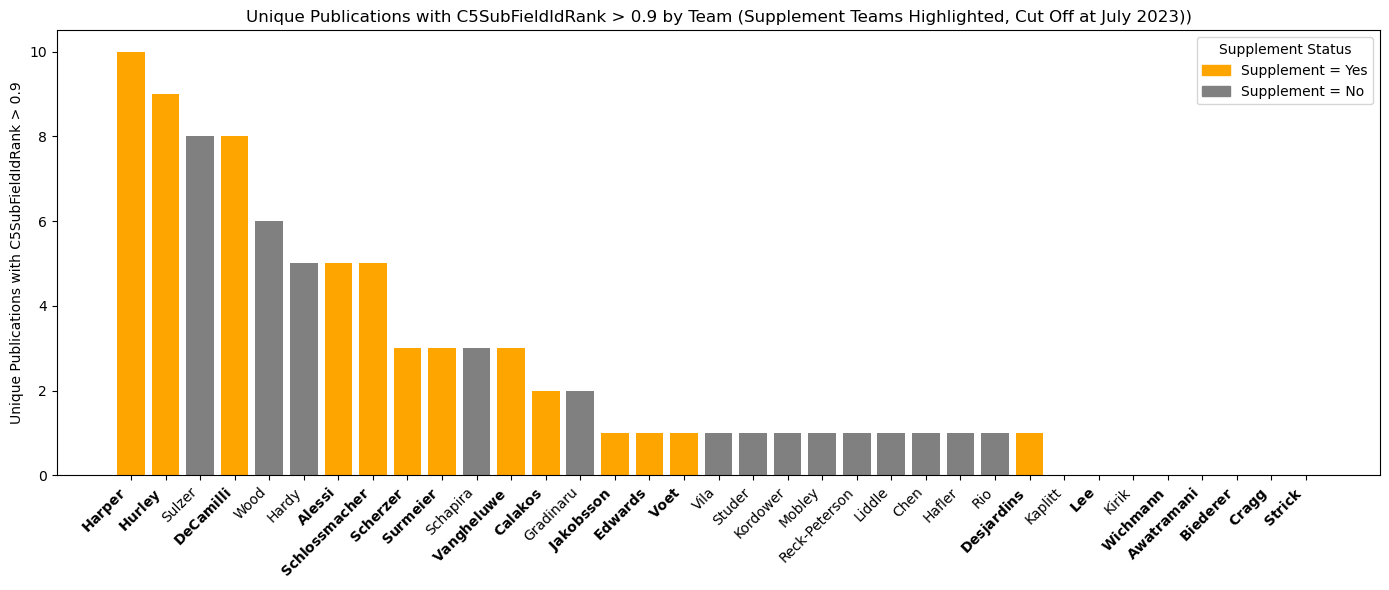

In [26]:
# --- Highlight and bold team names and people for supplement teams ---

# Prepare color and fontweight for each team
team_colors = ['orange' if supplement_map.get(team, 'No') == 'Yes' else 'grey' for team in unique_pub_counts.index]
team_labels = [f"$\\bf{{{team}}}$" if supplement_map.get(team, 'No') == 'Yes' else team for team in unique_pub_counts.index]

# Add legend for colors and supplement value

# 1. Bar chart: Number of scores > 0.9 for each team
plt.figure(figsize=(14, 6))
bars1 = plt.bar(unique_pub_counts.index, unique_pub_counts.values, color=team_colors)
plt.xticks(range(len(unique_pub_counts)), team_labels, rotation=45, ha='right')
plt.ylabel('Unique Publications with C5SubFieldIdRank > 0.9')
plt.title('Unique Publications with C5SubFieldIdRank > 0.9 by Team (Supplement Teams Highlighted, Cut Off at July 2023))')

import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color='orange', label='Supplement = Yes'),
    mpatches.Patch(color='grey', label='Supplement = No')
]
plt.legend(handles=legend_handles, title='Supplement Status', loc='upper right')

plt.tight_layout()
plt.savefig('unique_publications_gt_09_by_team.png', dpi=300)
plt.show()

# 2. Bar chart: Total number of scores > 0.9 for each team



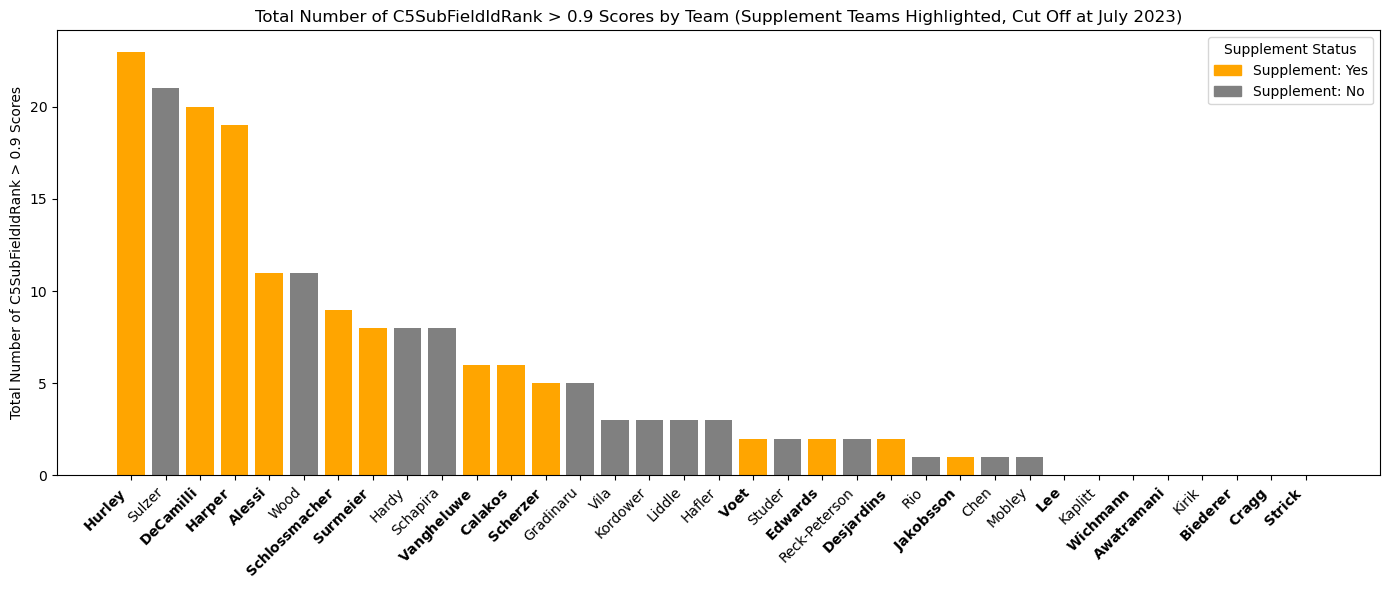

In [ ]:

plt.figure(figsize=(14, 6))
bars2 = plt.bar(team_score_counts.index, team_score_counts.values, color=[
    'orange' if supplement_map.get(team, 'No') == 'Yes' else 'grey' for team in team_score_counts.index
])
plt.xticks(range(len(team_score_counts)), [
    f"$\\bf{{{team}}}$" if supplement_map.get(team, 'No') == 'Yes' else team for team in team_score_counts.index
], rotation=45, ha='right')
plt.ylabel('Total Number of C5SubFieldIdRank > 0.9 Scores')
plt.title('Total Number of C5SubFieldIdRank > 0.9 Scores by Team (Supplement Teams Highlighted, Cut Off at July 2023)')
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color='orange', label='Supplement: Yes'),
    mpatches.Patch(color='grey', label='Supplement: No')
]
plt.legend(handles=legend_handles, title='Supplement Status', loc='upper right')


plt.tight_layout()
plt.savefig('total_scores_gt_09_by_team.png', dpi=300)
plt.show()

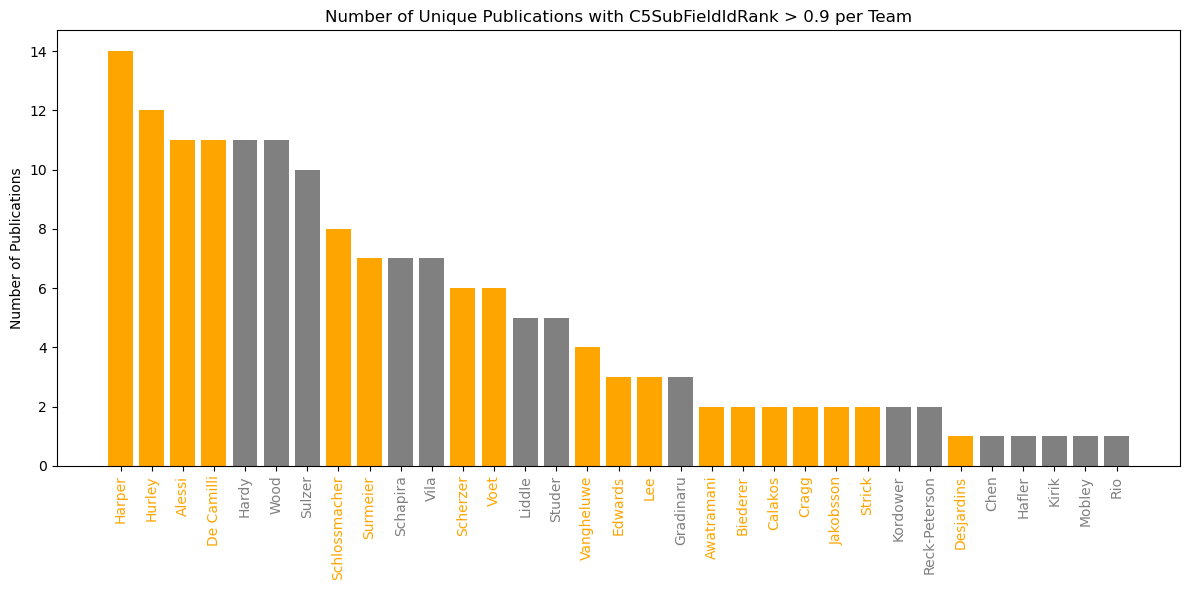

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Clean team names

# Step 2: Filter to only rows with score > 0.9
df_filtered = df[df['C5SubFieldIdRank'] > 0.9].copy()

# Step 3: Explode CleanedTeams
df_filtered = df_filtered.explode('CleanedTeams')

# Step 4: Clean team names (remove "Team " prefix)
df_filtered['Team'] = df_filtered['CleanedTeams'].str.replace("Team ", "", regex=False)

# Step 5: Drop duplicates on (OpenAlex_ID, Team)
df_filtered = df_filtered[['OpenAlex_ID', 'Team']].drop_duplicates()

# Step 6: Count unique publications per team
team_pub_counts = df_filtered.groupby('Team')['OpenAlex_ID'].nunique().reset_index()
team_pub_counts.rename(columns={'OpenAlex_ID': 'NumPubsOver0.9'}, inplace=True)

# Step 6.5: Merge with supplement_df
merged = pd.merge(team_pub_counts, supplement_df, on='Team', how='left')
merged['Supplement'] = merged['Supplement'].fillna('No')  # Treat missing as No

# Step 7: Sort
merged['SupplementBool'] = merged['Supplement'].map({'Yes': 1, 'No': 0})
merged = merged.sort_values(by=['NumPubsOver0.9', 'SupplementBool'], ascending=[False, False])

# Step 8: Plot
colors = ['orange' if val == 'Yes' else 'grey' for val in merged['Supplement']]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(merged['Team'], merged['NumPubsOver0.9'], color=colors)

# Set x-tick label colors
for label, supp in zip(ax.get_xticklabels(), merged['Supplement']):
    label.set_color('orange' if supp == 'Yes' else 'grey')

ax.set_title('Number of Unique Publications with C5SubFieldIdRank > 0.9 per Team')
ax.set_ylabel('Number of Publications')
ax.set_xticks(range(len(merged)))
ax.set_xticklabels(merged['Team'], rotation=90)
plt.tight_layout()
plt.show()


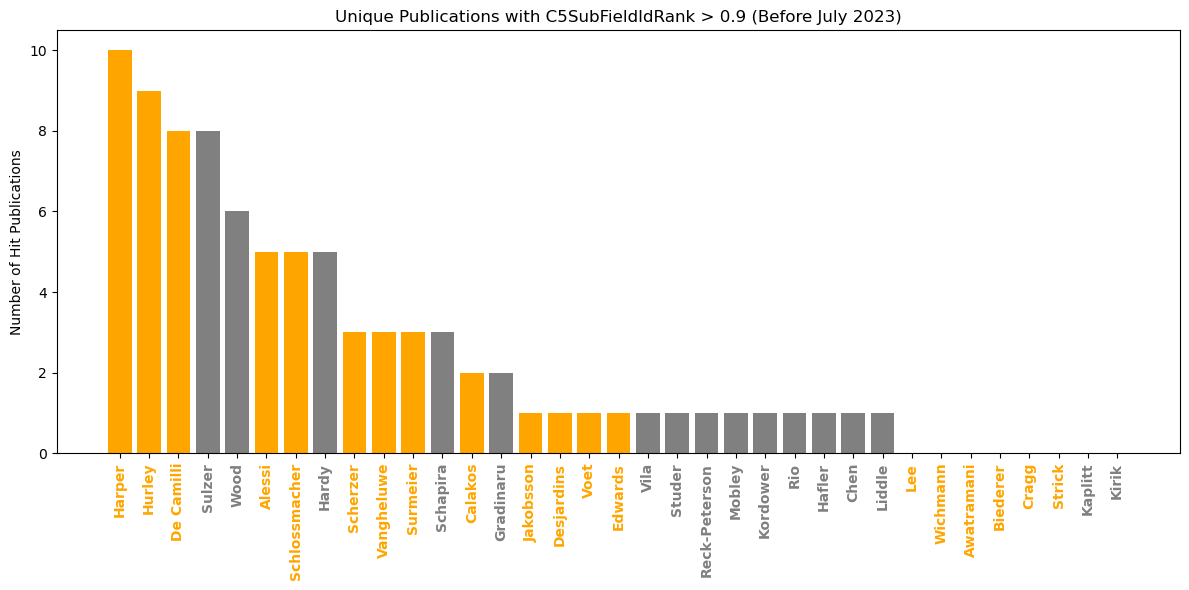

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Filter by DateCreated (before August 1, 2023)
df['DateCreated'] = pd.to_datetime(df['DateCreated'], errors='coerce')
df = df[df['DateCreated'] < '2023-08-01']

# Step 2: Filter to only rows with score > 0.9
df_filtered = df[df['C5SubFieldIdRank'] > 0.9].copy()

# Step 3: Explode CleanedTeams
df_filtered = df_filtered.explode('CleanedTeams')

# Step 4: Clean team names (remove "Team " prefix)
df_filtered['Team'] = df_filtered['CleanedTeams'].str.replace("Team ", "", regex=False)

# Step 5: Drop duplicates on (OpenAlex_ID, Team)
df_filtered = df_filtered[['OpenAlex_ID', 'Team']].drop_duplicates()

# Step 6: Count unique publications per team
team_pub_counts = df_filtered.groupby('Team')['OpenAlex_ID'].nunique().reset_index()
team_pub_counts.rename(columns={'OpenAlex_ID': 'NumPubsOver0.9'}, inplace=True)

# Step 6.5: Clean Team names in supplement_df
supplement_df['Team'] = supplement_df['Team'].str.replace("Team ", "", regex=False)

# Step 6.6: Merge with supplement_df (ensure all supplement teams appear)
merged = pd.merge(supplement_df, team_pub_counts, on='Team', how='left')
merged['NumPubsOver0.9'] = merged['NumPubsOver0.9'].fillna(0).astype(int)
merged['Supplement'] = merged['Supplement'].fillna('No')

# Step 7: Sort
merged['SupplementBool'] = merged['Supplement'].map({'Yes': 1, 'No': 0})
merged = merged.sort_values(by=['NumPubsOver0.9', 'SupplementBool'], ascending=[False, False])

# Step 8: Plot
colors = ['orange' if val == 'Yes' else 'grey' for val in merged['Supplement']]

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(merged['Team'], merged['NumPubsOver0.9'], color=colors)

# Set x-tick label colors
ax.set_xticks(range(len(merged)))
ax.set_xticklabels(merged['Team'], rotation=90, fontweight='bold')
for label, supp in zip(ax.get_xticklabels(), merged['Supplement']):
    label.set_color('orange' if supp == 'Yes' else 'grey')

ax.set_title('Unique Publications with C5SubFieldIdRank > 0.9 (Before July 2023)')
ax.set_ylabel('Number of Hit Publications')
plt.tight_layout()
plt.savefig('rework_unique_publications_gt_09_by_team_before_july_2023.png', dpi=300)
plt.show()


In [52]:
from scipy.stats import ttest_ind, mannwhitneyu

# Split into groups
supp_yes = merged[merged['Supplement'] == 'Yes']['NumPubsOver0.9']
supp_no = merged[merged['Supplement'] == 'No']['NumPubsOver0.9']

# Run T-test
t_stat, t_pval = ttest_ind(supp_yes, supp_no, equal_var=False)

# Run Mann-Whitney U test
u_stat, u_pval = mannwhitneyu(supp_yes, supp_no, alternative='two-sided')

# Print results
print("T-test:")
print(f"  t = {t_stat:.4f}, p = {t_pval:.4f}")

print("\nMann–Whitney U test:")
print(f"  U = {u_stat:.4f}, p = {u_pval:.4f}")


T-test:
  t = 0.7198, p = 0.4768

Mann–Whitney U test:
  U = 155.5000, p = 0.9182


In [35]:
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,manuscript_title,team,doi_pre,doi_pub,original_research,OpenAlex_ID,ListofAlexIds,...,TeamsThatCited,ReferencedTeams,IntReferences,ReferencedIndividuals,CleanedTeams,CleanedPeople,DateCreated,C5,C5SubFieldIdRank,SubFieldId
0,0,0,0.0,LRRK2 phosphorylation of Rab GTPases in Parkin...,Alessi,review,10.1002/1873-3468.14492,0.0,W4296162466,A5033452410,...,"['Team Hurley', 'Team Alessi', 'Team De Camilli']",['Team Alessi'],"['W3204672542', 'W3205174301']","['Dario Alessi', 'Suzanne Pfeffer']",['Team Alessi'],['Suzanne Pfeffer'],2022-09-18,NaN,NaN,NaN
1,1,2,2.0,PTEN-induced kinase 1 (PINK1) and Parkin: Unlo...,Alessi,review,10.1016/j.conb.2021.09.005,0.0,W3209929601,A5084528692,...,"['Team Harper', 'Team Reck-Peterson', 'Team Al...",['Team Hurley'],['W3153643350'],['James Hurley'],['Team Alessi'],['Miratul Muqit'],2021-11-08,NaN,NaN,NaN
2,2,6,6.0,Isotope tracing in health and disease,Alessi,review,10.1016/j.copbio.2022.102739,0.0,W4283208018,A5045437960,...,['Team Alessi'],[],[],[],['Team Alessi'],['Monther Abu-Remaileh'],2022-06-22,NaN,NaN,NaN
3,3,9,9.0,Whole proteome copy number dataset in primary ...,Alessi,none? review,10.1016/j.dib.2023.109336,0.0,W4381848193,A5084528692,...,[],['Team Alessi'],['W3213349298'],['Miratul Muqit'],['Team Alessi'],['Miratul Muqit'],2023-06-25,1.0,0.448275,1607.0
4,3,9,9.0,Whole proteome copy number dataset in primary ...,Alessi,none? review,10.1016/j.dib.2023.109336,0.0,W4381848193,A5084528692,...,[],['Team Alessi'],['W3213349298'],['Miratul Muqit'],['Team Alessi'],['Miratul Muqit'],2023-06-25,1.0,0.408122,2803.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,784,5330,5330.0,Alpha-synuclein aggregates trigger anti-viral ...,Wood,10.1101/2024.02.26.582055,NaN,1.0,W4392272337,A5011838243,...,NaN,['Team Wood'],"['W4283511977', 'W4293581901']","['Mina Ryten', 'Sonia Gandhi']","['Team Voet', 'Team Wood', 'Team Hardy']","['Thomas Warner', 'Sonia Gandhi', 'Mina Ryten']",2024-03-05,NaN,NaN,NaN
743,788,5361,5361.0,GLP1 receptor agonism ameliorates Parkinson’s ...,Wood,10.1101/2024.02.28.582460,NaN,1.0,W4392291460,A5042439287,...,NaN,['Team Wood'],"['W4293581901', 'W4309907185']",['Sonia Gandhi'],"['Team Hardy', 'Team Wood']","['Mina Ryten', 'Mathew Horrocks', 'Sonia Gandhi']",2024-03-05,NaN,NaN,NaN
744,792,5382,5382.0,"The diversity of SNCA transcripts in neurons, ...",Wood,10.1101/2024.05.30.596437,NaN,1.0,W4399213038,A5020514779,...,NaN,['Team Wood'],"['W4283511977', 'W4293581901', 'W4309907185', ...","['Mina Ryten', 'Sonia Gandhi', 'Michele Vendru...","['Team Hardy', 'Team Wood']","['John Hardy', 'Nicholas Wood', 'Michele Vendr...",2024-06-01,NaN,NaN,NaN
745,798,5400,5400.0,Network nature of ligand-receptor interactions...,Wood,10.1101/2024.06.15.599140,NaN,1.0,W4399716922,A5064529704,...,NaN,"['Team Hardy', 'Team Wood']","['W4308571577', 'W4361262952', 'W4367316359', ...","['Huw Morris', 'Mina Ryten']","['Team Wood', 'Team Hardy']","['Nicholas Wood', 'Sonia Gandhi', 'Mina Ryten']",2024-06-17,NaN,NaN,NaN


In [8]:
df["Work_Type"] = df["OpenAlex_ID"].apply(
    lambda x: Works()[x]["type"] if isinstance(x, str) and x.startswith("W") else ""
)

In [11]:
df["Work_Type"].value_counts()

article     565
preprint    110
review       66
letter        5
              1
Name: Work_Type, dtype: int64

In [14]:
# Filter to unique OpenAlex_IDs and non-empty OpenAlex_ID
df_unique = df.drop_duplicates(subset='OpenAlex_ID')
filtered = df_unique[df_unique['OpenAlex_ID'].notna() & (df_unique['OpenAlex_ID'] != '') & (df_unique['C5'].isna())]

# Show Work_Type counts where C5 is missing
filtered['Work_Type'].value_counts()

preprint    110
review       63
letter        5
article       1
Name: Work_Type, dtype: int64

In [4]:
df['DateCreated'] = pd.to_datetime(df['DateCreated'], errors='coerce')

In [11]:
import matplotlib.pyplot as plt

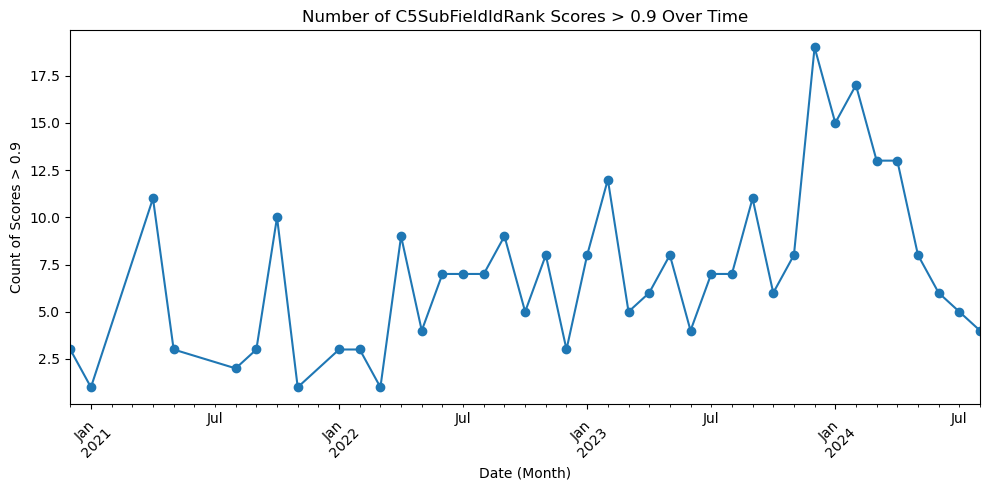

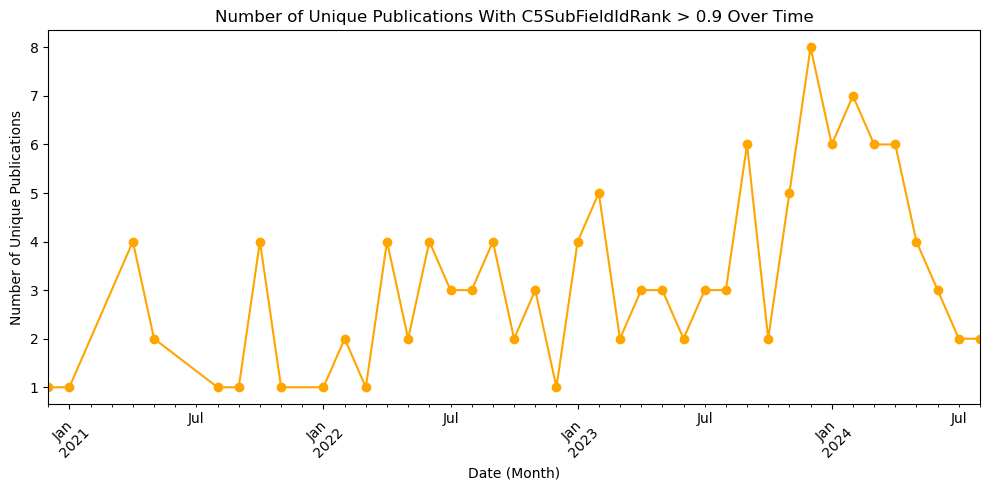

In [14]:
df_valid = df[(df['C5SubFieldIdRank'].notna()) & (df['DateCreated'].notna())]

# 1. Number of scores over 0.9 over time (by month)
scores_over_09 = df_valid[df_valid['C5SubFieldIdRank'] > 0.9]
scores_over_09_by_month = scores_over_09.groupby(scores_over_09['DateCreated'].dt.to_period('M')).size()

plt.figure(figsize=(10,5))
scores_over_09_by_month.plot(kind='line', marker='o')
plt.title('Number of C5SubFieldIdRank Scores > 0.9 Over Time')
plt.xlabel('Date (Month)')
plt.ylabel('Count of Scores > 0.9')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Number of unique OpenAlex_IDs with at least one score > 0.9 over time (by month)
# For each OpenAlex_ID, find the earliest DateCreated where C5SubFieldIdRank > 0.9
first_score_over_09 = scores_over_09.sort_values('DateCreated').drop_duplicates('OpenAlex_ID', keep='first')
unique_pubs_by_month = first_score_over_09.groupby(first_score_over_09['DateCreated'].dt.to_period('M'))['OpenAlex_ID'].nunique()#.cumsum()

plt.figure(figsize=(10,5))
unique_pubs_by_month.plot(kind='line', marker='o', color='orange')
plt.title('Number of Unique Publications With C5SubFieldIdRank > 0.9 Over Time')
plt.xlabel('Date (Month)')
plt.ylabel('Number of Unique Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

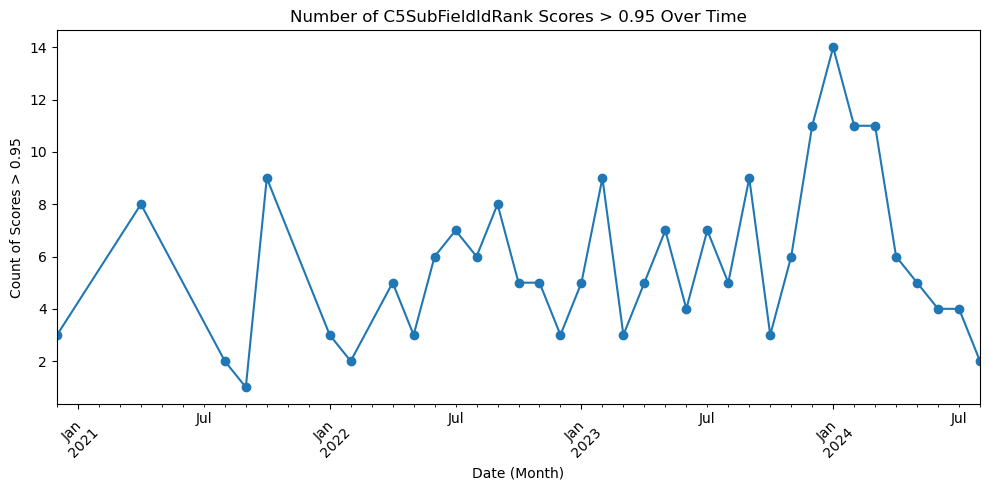

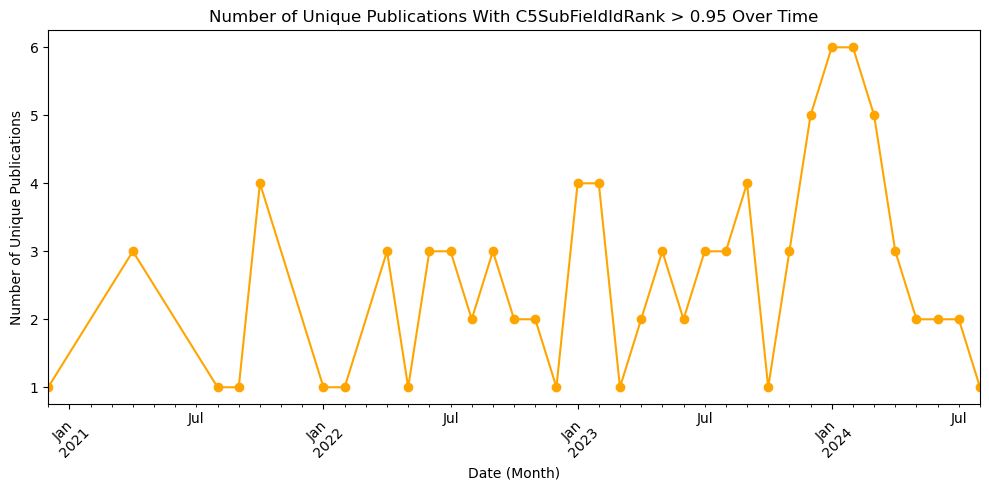

In [15]:
df_valid = df[(df['C5SubFieldIdRank'].notna()) & (df['DateCreated'].notna())]

# 1. Number of scores over 0.95 over time (by month)
scores_over_09 = df_valid[df_valid['C5SubFieldIdRank'] > 0.95]
scores_over_09_by_month = scores_over_09.groupby(scores_over_09['DateCreated'].dt.to_period('M')).size()

plt.figure(figsize=(10,5))
scores_over_09_by_month.plot(kind='line', marker='o')
plt.title('Number of C5SubFieldIdRank Scores > 0.95 Over Time')
plt.xlabel('Date (Month)')
plt.ylabel('Count of Scores > 0.95')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Number of unique OpenAlex_IDs with at least one score > 0.95 over time (by month)
# For each OpenAlex_ID, find the earliest DateCreated where C5SubFieldIdRank > 0.95
first_score_over_09 = scores_over_09.sort_values('DateCreated').drop_duplicates('OpenAlex_ID', keep='first')
unique_pubs_by_month = first_score_over_09.groupby(first_score_over_09['DateCreated'].dt.to_period('M'))['OpenAlex_ID'].nunique()#.cumsum()

plt.figure(figsize=(10,5))
unique_pubs_by_month.plot(kind='line', marker='o', color='orange')
plt.title('Number of Unique Publications With C5SubFieldIdRank > 0.95 Over Time')
plt.xlabel('Date (Month)')
plt.ylabel('Number of Unique Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

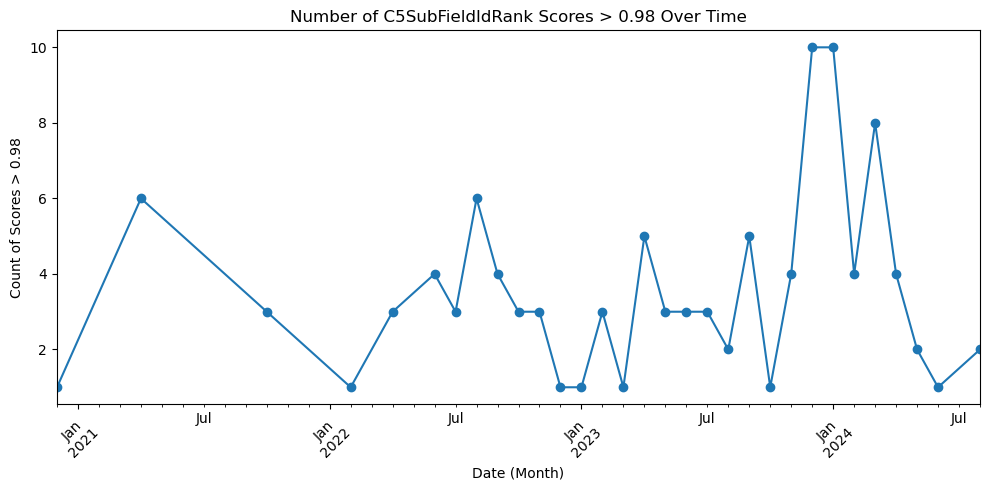

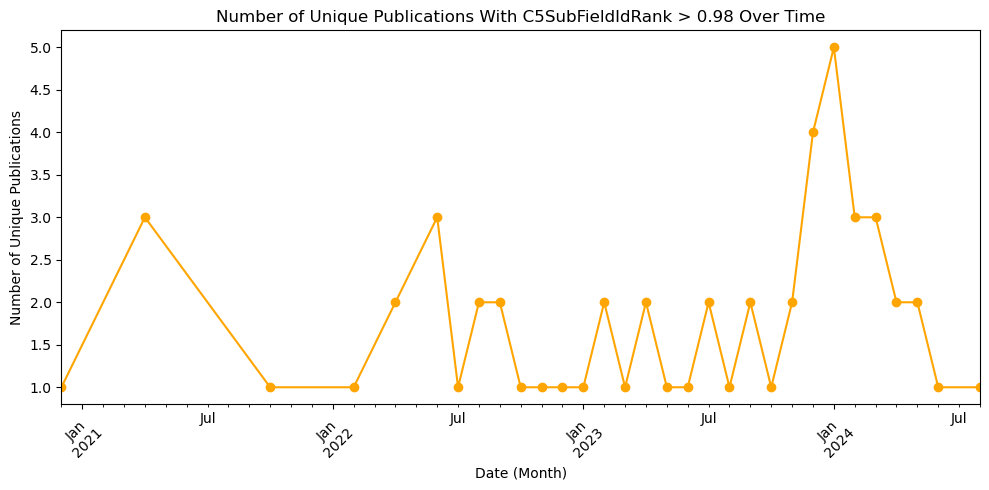

In [16]:
df_valid = df[(df['C5SubFieldIdRank'].notna()) & (df['DateCreated'].notna())]

# 1. Number of scores over 0.98 over time (by month)
scores_over_09 = df_valid[df_valid['C5SubFieldIdRank'] > 0.98]
scores_over_09_by_month = scores_over_09.groupby(scores_over_09['DateCreated'].dt.to_period('M')).size()

plt.figure(figsize=(10,5))
scores_over_09_by_month.plot(kind='line', marker='o')
plt.title('Number of C5SubFieldIdRank Scores > 0.98 Over Time')
plt.xlabel('Date (Month)')
plt.ylabel('Count of Scores > 0.98')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Number of unique OpenAlex_IDs with at least one score > 0.98 over time (by month)
# For each OpenAlex_ID, find the earliest DateCreated where C5SubFieldIdRank > 0.98
first_score_over_09 = scores_over_09.sort_values('DateCreated').drop_duplicates('OpenAlex_ID', keep='first')
unique_pubs_by_month = first_score_over_09.groupby(first_score_over_09['DateCreated'].dt.to_period('M'))['OpenAlex_ID'].nunique()#.cumsum()

plt.figure(figsize=(10,5))
unique_pubs_by_month.plot(kind='line', marker='o', color='orange')
plt.title('Number of Unique Publications With C5SubFieldIdRank > 0.98 Over Time')
plt.xlabel('Date (Month)')
plt.ylabel('Number of Unique Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

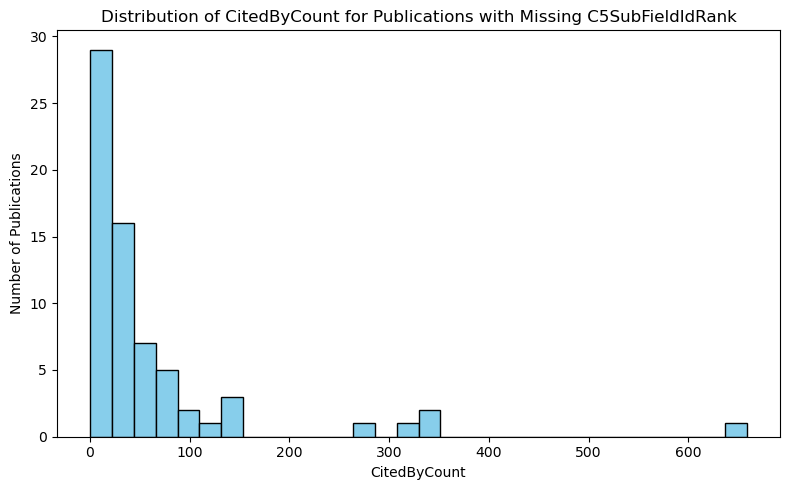

In [17]:
import matplotlib.pyplot as plt

# Filter for rows where C5SubFieldIdRank is missing
no_c5_df = df[df['C5SubFieldIdRank'].isna()]

# Plot distribution of CitedByCount
plt.figure(figsize=(8, 5))
plt.hist(no_c5_df['CitedByCount'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of CitedByCount for Publications with Missing C5SubFieldIdRank')
plt.xlabel('CitedByCount')
plt.ylabel('Number of Publications')
plt.tight_layout()
plt.show()

In [18]:
d3 = pd.read_csv('c5rank2023.csv') 